In [1]:
import pandas as pd


# Data Cleansing

In [2]:
books = pd.read_csv('../books.csv')

In [3]:
books.shape

(1500, 22)

In [4]:
books = books.drop(columns=['country', 'domain', 'gallery', 'image', 'model', 'url', 'weight', 'uniq_id', 'type'])

In [5]:
books_desc = books['desc']
books_desc[0]

'{"Description"=>{"Product Code"=>"9780553590487_20567", "ISBN-13"=>"9780553590487", "ISBN-10"=>"553590480", "Authored By"=>"Kay Hooper", "Publication Year"=>"2007", "Imprint"=>"Bantam", "Binding"=>"Others", "Languages"=>"English", "ISBN 13"=>"9780553590487"}, "Shipping Details"=>{"Estimated Arrival"=>"8 - 11 days", "Return Policy"=>"Seller will accept returns within a 15 days from date of delivery of the item"}}'

In [6]:
book_parse_desc = []
from ast import literal_eval
for a in books_desc:
    r = a.replace('=>', ':')
    r = r.replace('{"Description":', '')
    r = r.replace('{', '')
    r = r.replace('}', '')
    r = r.replace("'", "")
    r = r.replace("Shipping Details", '')
    r = r.replace("Terms & Condition", '')
    r = r.replace("Product Details", '')
    r = r.replace("Warranty Details", '')
    r = r.replace("Description", '')    
    r = r.replace('""' + ':', '')
    r = r.replace(' , ', '')
    r = "{" + r + "}"
    r = literal_eval(r)
    book_parse_desc.append(r)    

In [7]:
#books_desc
books1 = pd.DataFrame(x for x in book_parse_desc)


In [8]:
books1.columns

Index(['About the Author', 'Age', 'Age wise', 'Author', 'Author Info',
       'Authored By', 'Binding', 'Brand', 'Dimensions (L X B X H)',
       'Edited By', 'Edition', 'Estimated Arrival', 'ISBN 13', 'ISBN-10',
       'ISBN-13', 'ISBN10', 'ISBN13', 'Imprint', 'Imprints', 'Language',
       'Languages', 'No. Of Pages', 'Number Of Pages', 'Product Code',
       'Product Weight', 'Publication Year', 'Publisher', 'Publisher Name',
       'Publisher name', 'Return Policy', 'Series Name', 'Shipping Charge',
       'Specialization', 'Type', 'University', 'Warranty Summary', 'Weight',
       'Weight(Gm)', 'Weight(gm)'],
      dtype='object')

In [9]:
books1 = books1[['Author', 'Authored By', 'Binding', 'Publisher', 'Publication Year', 'Publisher Name']]



In [10]:
books1['Author'] = books1['Author'].map(str).replace('nan', '') + ' ' + books1['Authored By']
books1['Publisher'] = books1['Publisher'].map(str).replace('nan', '') + ' ' + books1['Publisher Name']

books1 = books1.drop(columns=['Authored By', 'Publisher Name'])

In [11]:
books1.head()

,Author,Binding,Publisher,Publication Year
0,Kay Hooper,Others,NaN,2007
1,Devaki Nandan Khatri,Paperback,Rupa Publications,2015
2,Tami Hoag,Paperback,Random House,2008
3,Danielle Steel,Paperback,Transworld Publishers,2015
4,NaN,Paperback,Books,2015


In [12]:
new_books = pd.concat([books, books1], axis=1)

In [13]:
other_sellers = books['other_sellers']
other_seller1 = []
other_seller2 = []
other_seller3 = []
other_seller4 = []
other_seller5 = []
other_seller6 = []
other_sellers = other_sellers.fillna('[{"name":"none"}]')
ex2 = []

In [14]:
for index, val in enumerate(other_sellers):
    if ("},{" not in other_sellers[index]): 
        other_seller1.append(val)
        other_seller2.append('[{"name": "none"}]')
        other_seller3.append('[{"name": "none"}]')
        other_seller4.append('[{"name":"none"}]')
        other_seller5.append('[{"name":"none"}]')
    
    elif ("},{" in other_sellers[index]): 
        try: 
            OS1, OS2 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append('[{"name":"none"}]')
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
        
        try: 
            OS1, OS2, OS3 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append('[{"name":"none"}]')
            other_seller5.append('[{"name":"none"}]')
                       
        except:
            pass
    
        try: 
            OS1, OS2, OS3, OS4 = other_sellers[index].split("},{")
            other_seller1.append(OS1+ "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append('[{"name":"none"}]')
                        
        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")

        except:
            pass
       
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2+ "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6, OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass
        try: 
            OS1, OS2, OS3, OS4, OS5, OS6,  OS7, OS8, OS9, OS10, OS11, OS12, OS13, OS14, OS15, OS16, OS17, OS18, OS19, OS20, OS21, OS22 = other_sellers[index].split("},{")
            other_seller1.append(OS1 + "}]")
            other_seller2.append("[{" + OS2 + "}]")
            other_seller3.append("[{" + OS3 + "}]")
            other_seller4.append("[{" + OS4 + "}]")
            other_seller5.append("[{" + OS5 + "}]")
        except:
            pass

        

In [15]:
import json
other_seller1new = []
other_seller2new = []
other_seller3new = []
other_seller4new = []
other_seller5new = []

for i in other_seller1:
    r = i.replace('[', '')
    r = r.replace(']', '')
#     ex2.append(r)
    other_seller1new.append(json.loads(r))

for l in other_seller2:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller2new.append(json.loads(r))
    
for l in other_seller3:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller3new.append(json.loads(r))
    
for l in other_seller4:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller4new.append(json.loads(r))
    
for l in other_seller5:
    r = l.replace('[', '')
    r = r.replace(']', '')  
    r = r.replace('}}', '}')
    r = r.replace('{{', '{')
    other_seller5new.append(json.loads(r))
    

In [16]:
other_seller1new

[{'name': 'A1',
  'id': 44120,
  'offer_text': None,
  'offer_price': 359,
  'totalScore': -359,
  'product_id': 10050188,
  'url': 'https://catalog.paytm.com/v1/p/c-j-s-fate-9780553590487_44120',
  'seourl': 'https://catalog.paytm.com/v1/p/c-j-s-fate-9780553590487_44120',
  'exist': True,
  'applied': False},
 {'name': 'comma365 ',
  'id': 21057,
  'offer_text': None,
  'offer_price': 316,
  'totalScore': -316,
  'product_id': 34179194,
  'url': 'https://catalog.paytm.com/v1/p/chandrakanta-9788129131126_21057',
  'seourl': 'https://catalog.paytm.com/v1/p/chandrakanta-9788129131126_21057',
  'exist': True,
  'applied': False},
 {'name': 'none'},
 {'name': 'comma365 ',
  'id': 21057,
  'offer_text': None,
  'offer_price': 319,
  'totalScore': -319,
  'product_id': 30214839,
  'url': 'https://catalog.paytm.com/v1/p/perfect-life-9780552165891_21057',
  'seourl': 'https://catalog.paytm.com/v1/p/perfect-life-9780552165891_21057',
  'exist': True,
  'applied': False},
 {'name': 'NSGlobal',
 

In [17]:
ex2[0:4]

[]

In [18]:
OS1 = pd.DataFrame(x for x in other_seller1new)
OS1 = OS1[['name','offer_price']]
OS1 = OS1.rename(index=str, columns={"name":"seller1_name", "offer_price": "seller1_selling_price"})

OS2 = pd.DataFrame(x for x in other_seller2new)
OS2 = OS2[['name','offer_price']]
OS2 = OS2.rename(index=str, columns={"name":"seller2_name", "offer_price": "seller2_selling_price"})

OS3 = pd.DataFrame(x for x in other_seller3new)
OS3 = OS3[['name','offer_price']]
OS3 = OS3.rename(index=str, columns={"name":"seller3_name", "offer_price": "seller3_selling_price"})

OS4 = pd.DataFrame(x for x in other_seller4new)
OS4 = OS4[['name','offer_price']]
OS4 = OS4.rename(index=str, columns={"name":"seller4_name", "offer_price": "seller4_selling_price"})

OS5 = pd.DataFrame(x for x in other_seller5new)
OS5 = OS5[['name','offer_price']]
OS5 = OS5.rename(index=str, columns={"name":"seller5_name", "offer_price": "seller5_selling_price"})

In [19]:
OS1.head()

,seller1_name,seller1_selling_price
0,A1,359.0
1,comma365,316.0
2,none,NaN
3,comma365,319.0
4,NSGlobal,1949.0


In [20]:
OS1.index = OS1.index.astype(int)
OS2.index = OS2.index.astype(int)
OS3.index = OS3.index.astype(int)
OS4.index = OS4.index.astype(int)
OS5.index = OS5.index.astype(int)

new_books = pd.merge(books, books1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS1, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS2, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS3, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS4, left_index=True, right_index=True)
new_books = pd.merge(new_books, OS5, left_index=True, right_index=True)


In [21]:
new_books = new_books.drop(columns=['desc', 'insertedon', 'other_sellers', 'specifications'])


In [22]:
publisher_new_books = new_books['brand'].fillna(new_books['Publisher'])
publisher_new_books
new_books = new_books.merge(publisher_new_books.to_frame(), left_index=True, right_index=True)
new_books

,amtsave,brand_x,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,Author,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,NaN,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,Kay Hooper,...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Rupa Publications India,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,Devaki Nandan Khatri,...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Random House,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,Tami Hoag,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Transworld Publishers,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,Danielle Steel,...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,NaN,...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Random House Publishing Group,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,Christopher Reich,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Dell,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,John Grisham,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Random House,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,"Stevens, Taylor",...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Random House Publishing Group,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,Jude Deveraux,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Harper Collins Publishers India,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,Erin Hunter,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


In [23]:
new_books = new_books.drop(columns=['brand_x', 'Publisher'])
new_books

,amtsave,breadcrumbs,discount,list_price,name,payment_methods_supported,productcode,selling_price,Author,Binding,...,seller1_selling_price,seller2_name,seller2_selling_price,seller3_name,seller3_selling_price,seller4_name,seller4_selling_price,seller5_name,seller5_selling_price,brand_y
0,72,Books | Literature & Fiction | Romance | C.J.'...,20%%,358,C.J.'s Fate,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",2431977,286,Kay Hooper,Others,...,359.0,none,NaN,none,NaN,none,NaN,none,NaN,NaN
1,117,Books | Literature & Fiction | Short Stories |...,30%%,395,Chandrakanta,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",22655539,278,Devaki Nandan Khatri,Paperback,...,316.0,Starmark,356.0,Aarohi Online Book Shop,495.0,none,NaN,none,NaN,Rupa Publications India
2,57,Books | Literature & Fiction | Romance | Heart...,14%%,416,Heart Of Dixie,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13587974,359,Tami Hoag,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
3,84,Books | Literature & Fiction | General | Perfe...,21%%,399,Perfect Life,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",29545536,315,Danielle Steel,Paperback,...,319.0,Sagar Enterprises,319.0,BOOKSMANDI,339.0,Dux Marketing Services,369.0,Booknest,399.0,Transworld Publishers
4,1050,Books | Literature & Fiction | Literature | Pa...,35%%,2999,Paulo Coelho The Golden Collection,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",23104384,1949,NaN,Paperback,...,1949.0,GS RETAIL,1949.0,Onebuy.in,2249.0,BSSdelhi,2308.0,Book Place,2339.0,Books
5,63,Books | Literature & Fiction | Suspense Thrill...,14%%,462,The Devil's Banker,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",12136614,399,Christopher Reich,Others,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
6,75,Books | Literature & Fiction | Suspense Thrill...,14%%,554,The Brethren,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",10046244,479,John Grisham,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Dell
7,53,Books | Literature & Fiction | General | The I...,11%%,485,The Innocent,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",32878233,432,"Stevens, Taylor",Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House
8,63,Books | Literature & Fiction | Romance | True ...,14%%,462,True Love,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",13669961,399,Jude Deveraux,Others,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Random House Publishing Group
9,90,Books | Literature & Fiction | General | Warri...,36%%,250,Warriors: Power of Three #3: Outcast,"[""Credit Card"", ""Debit Card"", ""Net Banking"", ""...",44858122,160,Erin Hunter,Paperback,...,NaN,none,NaN,none,NaN,none,NaN,none,NaN,Harper Collins Publishers India


# What are the Top Selling Books and Their Prices

In [24]:
new_books.name.value_counts()[0:6].sort_index().plot.pie(figsize=(15,5))

In [25]:
new_books.name.value_counts()[0:6]

Selected Stories                            8
Alice In The Country Of Clover: Cheshire    4
Love Story                                  3
Alice In The Country Of Joker: Circus An    3
No Hero                                     3
The Bridges of Constantine                  3
Name: name, dtype: int64

In [26]:
selected_stories = new_books[new_books.name == "Selected Stories"].selling_price.mean()
alice_clover  = new_books[new_books.name == "Alice In The Country Of Clover: Cheshire"].selling_price.mean()
love_story = new_books[new_books.name == "Love Story"].selling_price.mean()
alice_joker = new_books[new_books.name == "Alice In The Country Of Joker: Circus An"].selling_price.mean()
no_hero = new_books[new_books.name == "No Hero"].selling_price.mean()
bridges = new_books[new_books.name == "The Bridges of Constantine"].selling_price.mean()


In [27]:
print(selected_stories)
print(alice_clover)
print(love_story)
print(alice_joker)
print(no_hero)
print(bridges)


98.0
639.0
145.66666666666666
599.0
424.3333333333333
323.0


# What Prices Attract Customers

In [28]:
authors = pd.DataFrame(data = new_books.Author.value_counts()).index

In [29]:
prices = []
def calculate_author_avg(names):
    for i in names:
        price = new_books[new_books.Author == i].selling_price.mean()
        prices.append(price)

calculate_author_avg(authors)



In [30]:
authors_df = pd.DataFrame(data = new_books.Author.value_counts())

In [31]:
authors_df['avg_prices'] = prices

In [32]:
authors_df.describe()

,Author,avg_prices
count,689.000000,689.000000
mean,1.493469,604.211389
std,1.923017,795.322319
min,1.000000,64.000000
25%,1.000000,259.000000
50%,1.000000,399.000000
75%,1.000000,718.000000
max,27.000000,12801.000000


In [33]:
price_bins = []

for price in authors_df['avg_prices']:
    if(price <= 200):
        price_bins.append(1)
    if(price > 200 and price <= 400):
        price_bins.append(2)
    if(price > 400 and price <= 600):
        price_bins.append(3)
    if(price > 600 and price <= 800):
        price_bins.append(4)
    if(price > 800):
        price_bins.append(5)

authors_df['bins'] = price_bins

In [34]:
price_counts = []
    
price_counts.append(authors_df[authors_df['bins'] == 1].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 2].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 3].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 4].Author.sum())
price_counts.append(authors_df[authors_df['bins'] == 5].Author.sum())


In [35]:
price_counts

[129, 501, 105, 155, 139]

In [36]:
bins = list(set(price_bins))

Text(0, 0.5, 'Sum')

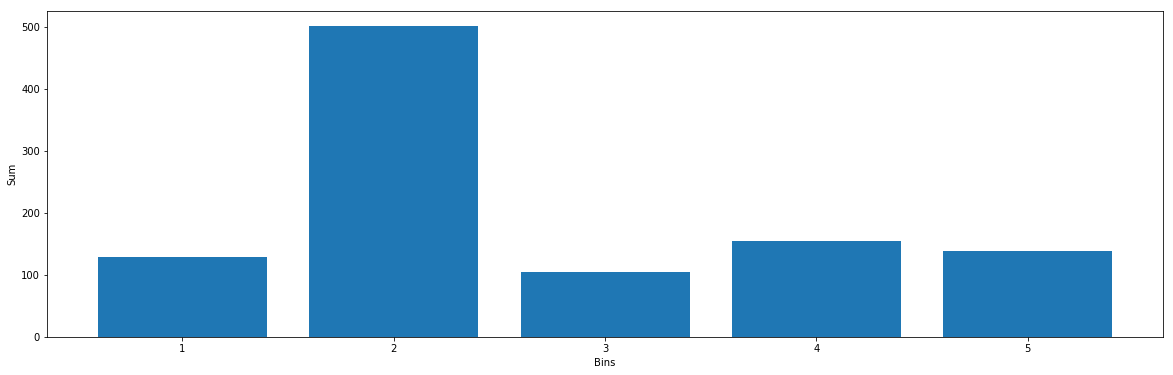

In [37]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 6))

plt.bar(bins, price_counts)
plt.xlabel ('Bins')
plt.ylabel ('Sum')


# What percentage of Books Is Being Sold

In [38]:
a = new_books.name.value_counts()


In [39]:
a = pd.DataFrame(data = a)

In [40]:
c = []
for bc in a.index:
    ac = new_books[new_books['name'] == bc ].selling_price.mean()
    c.append(ac)
    
a['prices'] = c

In [41]:
a.head()

,name,prices
Selected Stories,8,98.000000
Alice In The Country Of Clover: Cheshire,4,639.000000
Love Story,3,145.666667
Alice In The Country Of Joker: Circus An,3,599.000000
No Hero,3,424.333333


In [42]:
price_bins = []

for price in a['prices']:
    if(price <= 200):
        price_bins.append(1)
    if(price > 200 and price <= 400):
        price_bins.append(2)
    if(price > 400 and price <= 600):
        price_bins.append(3)
    if(price > 600 and price <= 800):
        price_bins.append(4)
    if(price > 800):
        price_bins.append(5)

a['bins'] = price_bins

In [43]:
a.head()

,name,prices,bins
Selected Stories,8,98.000000,1
Alice In The Country Of Clover: Cheshire,4,639.000000,4
Love Story,3,145.666667,1
Alice In The Country Of Joker: Circus An,3,599.000000,3
No Hero,3,424.333333,3


In [44]:
a[a['bins'] == 1].bins.count()

185

In [45]:
a[a['bins'] == 2].bins.count()

727

In [46]:
a[a['bins'] == 3].bins.count()

164

In [47]:
a[a['bins'] == 4].bins.count()

182

In [48]:
a[a['bins'] == 5].bins.count()

197

# How Do Prices between Sellers Compare

In [113]:
other_sell

,name,selling_price,seller1_selling_price,seller2_selling_price,seller3_selling_price,seller4_selling_price,seller5_selling_price,avg
0,C.J.'s Fate,286,359.0,NaN,NaN,NaN,NaN,359.000000
1,Chandrakanta,278,316.0,356.0,495.0,NaN,NaN,389.000000
2,Heart Of Dixie,359,NaN,NaN,NaN,NaN,NaN,NaN
3,Perfect Life,315,319.0,319.0,339.0,369.0,399.0,349.000000
4,Paulo Coelho The Golden Collection,1949,1949.0,1949.0,2249.0,2308.0,2339.0,2158.800000
5,The Devil's Banker,399,NaN,NaN,NaN,NaN,NaN,NaN
6,The Brethren,479,NaN,NaN,NaN,NaN,NaN,NaN
7,The Innocent,432,NaN,NaN,NaN,NaN,NaN,NaN
8,True Love,399,NaN,NaN,NaN,NaN,NaN,NaN
9,Warriors: Power of Three #3: Outcast,160,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
other_sell[['name', 'selling_price']]

,name,selling_price
0,C.J.'s Fate,286
1,Chandrakanta,278
2,Heart Of Dixie,359
3,Perfect Life,315
4,Paulo Coelho The Golden Collection,1949
5,The Devil's Banker,399
6,The Brethren,479
7,The Innocent,432
8,True Love,399
9,Warriors: Power of Three #3: Outcast,160


In [154]:
other_sell.name.value_counts()[0:6]

Selected Stories                            8
Alice In The Country Of Clover: Cheshire    4
Love Story                                  3
Alice In The Country Of Joker: Circus An    3
No Hero                                     3
The Bridges of Constantine                  3
Name: name, dtype: int64

In [176]:
other_sell

,name,selling_price,seller1_selling_price,seller2_selling_price,seller3_selling_price,seller4_selling_price,seller5_selling_price,avg
0,C.J.'s Fate,286,359.0,NaN,NaN,NaN,NaN,359.000000
1,Chandrakanta,278,316.0,356.0,495.0,NaN,NaN,389.000000
2,Heart Of Dixie,359,NaN,NaN,NaN,NaN,NaN,NaN
3,Perfect Life,315,319.0,319.0,339.0,369.0,399.0,349.000000
4,Paulo Coelho The Golden Collection,1949,1949.0,1949.0,2249.0,2308.0,2339.0,2158.800000
5,The Devil's Banker,399,NaN,NaN,NaN,NaN,NaN,NaN
6,The Brethren,479,NaN,NaN,NaN,NaN,NaN,NaN
7,The Innocent,432,NaN,NaN,NaN,NaN,NaN,NaN
8,True Love,399,NaN,NaN,NaN,NaN,NaN,NaN
9,Warriors: Power of Three #3: Outcast,160,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
sellers = pd.DataFrame(data = other_sell.name.value_counts()).index
sellers

Index(['Selected Stories', 'Alice In The Country Of Clover: Cheshire',
       'Love Story', 'Alice In The Country Of Joker: Circus An', 'No Hero',
       'The Bridges of Constantine', 'Friends Forever', 'Plugged',
       'A Twist Of The Knife', 'The Target',
       ...
       'The Very Best Of Fantasy and Science Fiction',
       'Dont Give Up Dont Give In Zamperini LouisRensin David', 'The Decision',
       'Toll the Hounds (Malazan Book of the Fallen- #8)',
       'Don't Want To Miss A Thing', 'Break No Bones',
       'The 80/20 Manager: Ten Ways To Become A Great Leader', 'Tommo & Hawk',
       'Newcomer', 'Bodyguard'],
      dtype='object', length=1455)

In [213]:
seller_price = []
def calculate_seller_avg(names):
    for i in names:
        price = other_sell[other_sell.name == i].selling_price.mean()
        seller_price.append(price)

calculate_seller_avg(sellers)


[98.0,
 639.0,
 145.66666666666666,
 599.0,
 424.3333333333333,
 323.0,
 499.0,
 349.5,
 391.0,
 393.0,
 215.5,
 1519.0,
 779.0,
 254.0,
 290.0,
 374.5,
 559.5,
 77.5,
 6309.0,
 215.5,
 887.0,
 430.5,
 291.5,
 237.0,
 207.5,
 260.5,
 445.0,
 718.0,
 212.5,
 253.5,
 174.5,
 158.0,
 349.0,
 273.0,
 298.0,
 1949.0,
 6500.0,
 1174.0,
 1976.0,
 399.0,
 399.0,
 399.0,
 105.0,
 389.0,
 719.0,
 218.0,
 235.0,
 259.0,
 107.0,
 1232.0,
 719.0,
 149.0,
 399.0,
 679.0,
 139.0,
 1177.0,
 679.0,
 717.0,
 263.0,
 399.0,
 249.0,
 352.0,
 399.0,
 4962.0,
 315.0,
 263.0,
 717.0,
 399.0,
 150.0,
 389.0,
 420.0,
 399.0,
 263.0,
 280.0,
 96.0,
 676.0,
 325.0,
 2017.0,
 1183.0,
 455.0,
 315.0,
 235.0,
 399.0,
 399.0,
 495.0,
 325.0,
 249.0,
 286.0,
 399.0,
 259.0,
 296.0,
 475.0,
 389.0,
 399.0,
 399.0,
 279.0,
 5580.0,
 350.0,
 827.0,
 259.0,
 127.0,
 349.0,
 158.0,
 263.0,
 399.0,
 180.0,
 201.0,
 1033.0,
 399.0,
 259.0,
 604.0,
 359.0,
 224.0,
 98.0,
 407.0,
 359.0,
 399.0,
 432.0,
 299.0,
 273.0,
 900.0

In [215]:
other_seller_price1 = []
def calculate_other_seller_avg1(names):
    for i in names:
        price = other_sell[other_sell.name == i].seller1_selling_price.mean()
        other_seller_price1.append(price)

calculate_other_seller_avg1(sellers)  


In [217]:
other_seller_price2 = []
def calculate_other_seller_avg2(names):
    for i in names:
        price = other_sell[other_sell.name == i].seller2_selling_price.mean()
        other_seller_price2.append(price)

calculate_other_seller_avg2(sellers)  

In [218]:
other_seller_price3 = []
def calculate_other_seller_avg3(names):
    for i in names:
        price = other_sell[other_sell.name == i].seller3_selling_price.mean()
        other_seller_price3.append(price)

calculate_other_seller_avg3(sellers)  

In [222]:
other_seller_price4 = []
def calculate_other_seller_avg4(names):
    for i in names:
        price = other_sell[other_sell.name == i].seller4_selling_price.mean()
        other_seller_price4.append(price)

calculate_other_seller_avg4(sellers)  

In [221]:
other_seller_price5 = []
def calculate_other_seller_avg5(names):
    for i in names:
        price = other_sell[other_sell.name == i].seller5_selling_price.mean()
        other_seller_price5.append(price)

calculate_other_seller_avg5(sellers)  

In [191]:
seller_df = pd.DataFrame(data = other_sell.name.value_counts())


In [195]:
seller_df['avg_seller_price'] = seller_price

In [231]:
seller_df['avg_other_price1'] = other_seller_price1

In [232]:
seller_df['avg_other_price2'] = other_seller_price2

In [233]:
seller_df['avg_other_price3'] = other_seller_price3

In [234]:
seller_df['avg_other_price4'] = other_seller_price4

In [235]:
seller_df['avg_other_price5'] = other_seller_price5

In [237]:
seller_df[0:15]

,name,avg_seller_price,avg_other_price1,avg_other_price2,avg_other_price3,avg_other_price4,avg_other_price5
Selected Stories,8,98.000000,105.375,106.875,114.625,122.0,140.0
Alice In The Country Of Clover: Cheshire,4,639.000000,NaN,NaN,NaN,NaN,NaN
Love Story,3,145.666667,139.000,144.000,165.000,196.0,199.0
Alice In The Country Of Joker: Circus An,3,599.000000,NaN,NaN,NaN,NaN,NaN
No Hero,3,424.333333,NaN,NaN,NaN,NaN,NaN
The Bridges of Constantine,3,323.000000,386.500,NaN,NaN,NaN,NaN
Friends Forever,2,499.000000,NaN,NaN,NaN,NaN,NaN
Plugged,2,349.500000,374.500,379.500,427.000,444.0,449.0
A Twist Of The Knife,2,391.000000,311.000,315.000,319.000,369.0,399.0
The Target,2,393.000000,287.000,299.000,300.000,303.0,311.0


Text(0.5, 1.0, 'Average Seller Price vs Other Sellers')

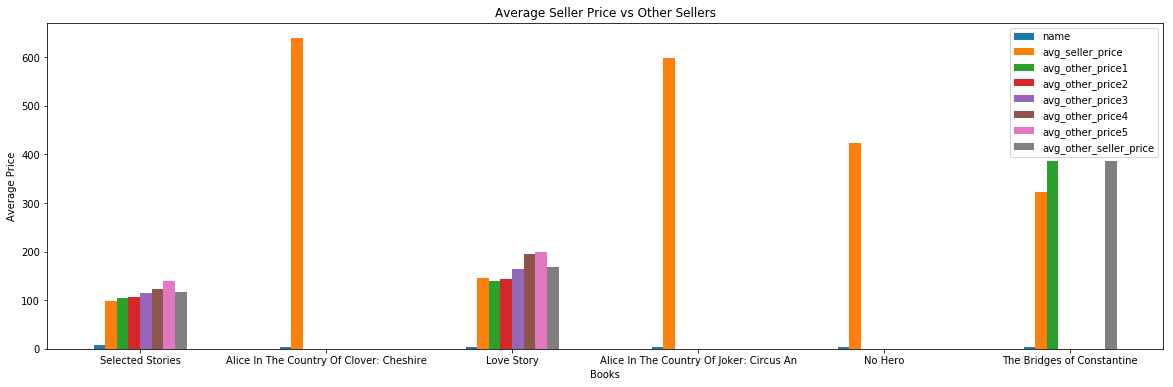

In [278]:
seller_df[0:6].plot.bar(rot=0)
plt.xlabel ('Books')
plt.ylabel ('Average Price')
plt.title('Average Seller Price vs Other Sellers')

In [246]:
seller_df['avg_other_seller_price'] = seller_df[['avg_other_price1', 'avg_other_price2','avg_other_price3'
                                                ,'avg_other_price4','avg_other_price5']].mean(axis=1)

In [260]:
#dataframe containing top 10 books along with average seller_price and the averages of each other seller price 
#also contains the average of all other sellers.
seller_df[0:10]

,name,avg_seller_price,avg_other_price1,avg_other_price2,avg_other_price3,avg_other_price4,avg_other_price5,avg_other_seller_price
Selected Stories,8,98.000000,105.375,106.875,114.625,122.0,140.0,117.775
Alice In The Country Of Clover: Cheshire,4,639.000000,NaN,NaN,NaN,NaN,NaN,NaN
Love Story,3,145.666667,139.000,144.000,165.000,196.0,199.0,168.600
Alice In The Country Of Joker: Circus An,3,599.000000,NaN,NaN,NaN,NaN,NaN,NaN
No Hero,3,424.333333,NaN,NaN,NaN,NaN,NaN,NaN
The Bridges of Constantine,3,323.000000,386.500,NaN,NaN,NaN,NaN,386.500
Friends Forever,2,499.000000,NaN,NaN,NaN,NaN,NaN,NaN
Plugged,2,349.500000,374.500,379.500,427.000,444.0,449.0,414.800
A Twist Of The Knife,2,391.000000,311.000,315.000,319.000,369.0,399.0,342.600
The Target,2,393.000000,287.000,299.000,300.000,303.0,311.0,300.000


Text(0.5, 1.0, 'Average Seller Price vs Average Other Seller Price')

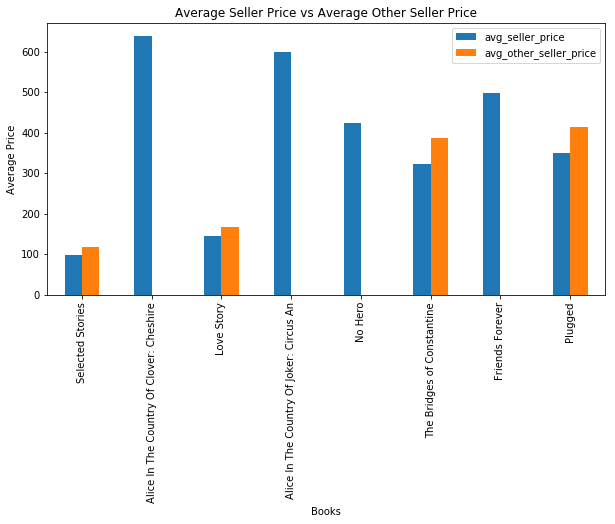

In [277]:
#average seller price compared with avg_other seller price
seller_df[0:8].plot.bar(y=['avg_seller_price', 'avg_other_seller_price'], figsize=(10,5))
plt.xlabel ('Books')
plt.ylabel ('Average Price')
plt.title('Average Seller Price vs Average Other Seller Price')